<a href="https://colab.research.google.com/github/MathieuForge/Moneyradar/blob/main/milliardaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df =pd.read_csv('/content/Fortunes_from_2013_to_2023.csv')

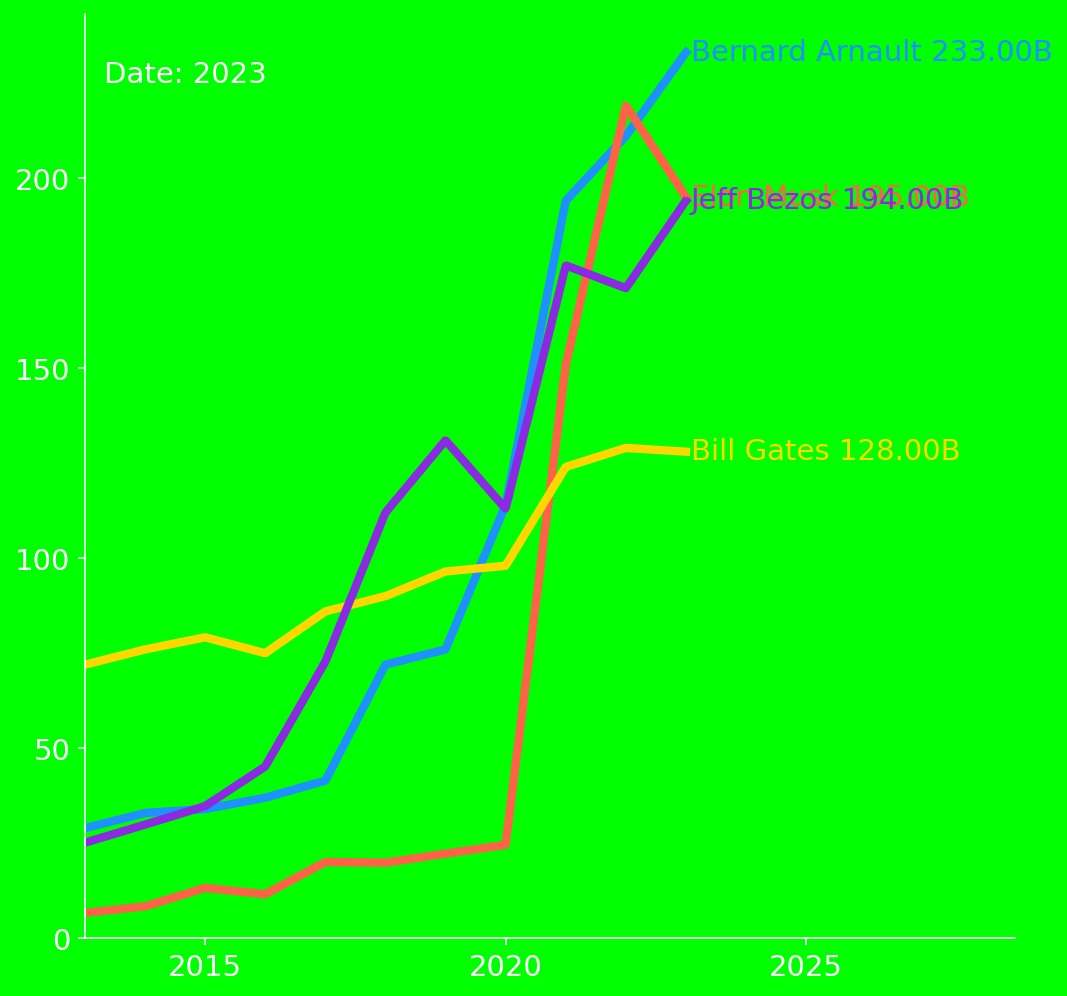

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Creating DataFrame from the provided dataset
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Bernard Arnault': [29.0, 33.0, 34.0, 37.0, 41.5, 72.0, 76.0, 114.0, 194.0, 211.0, 233.0],
    'Elon Musk': [6.7, 8.4, 13.3, 11.6, 20.1, 19.9, 22.3, 24.6, 151.0, 219.0, 195.0],
    'Bill Gates': [72.0, 76.0, 79.2, 75.0, 86.0, 90.0, 96.5, 98.0, 124.0, 129.0, 128.0],
    'Jeff Bezos': [25.2, 29.9, 34.8, 45.2, 72.8, 112.0, 131.0, 113.0, 177.0, 171.0, 194.0]
}

df = pd.DataFrame(data)

# Convert the 'Year' column to datetime format
df['Year'] = df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Year'] + '-01-01')

x_data = df['Date'].values.astype('datetime64[D]')
y_data = {
    'Bernard Arnault': df['Bernard Arnault'].values,
    'Elon Musk': df['Elon Musk'].values,
    'Bill Gates': df['Bill Gates'].values,
    'Jeff Bezos': df['Jeff Bezos'].values
}

# Number of frames for a 15 second animation at 60 fps
total_frames = 15 * 60

# Interpolate the data to get more frames
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp = {key: np.interp(time_interp, np.arange(len(values)), values) for key, values in y_data.items()}

# Calculate the six-year period with day precision
six_years = np.timedelta64(6 * 365, 'D')  # Approximation of 6 years in days
end_initial_period = x_interp.min() + six_years

# Create the figure and axes with high resolution to avoid pixelation
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)  # Adjust the size and resolution of the figure

# Set the green background for the figure and axes
fig.patch.set_facecolor('#00FF00')
ax.set_facecolor('#00FF00')

# Remove the top and right frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Configure the x-axis to display only years every 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Brighter colors
colors = {
    'Bernard Arnault': '#1E90FF',  # Dodger Blue
    'Elon Musk': '#FF6347',  # Tomato
    'Bill Gates': '#FFD700',  # Gold
    'Jeff Bezos': '#8A2BE2'  # Blue Violet
}

# Set the color of the axes and labels to white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white', labelsize=14)
ax.tick_params(axis='y', colors='white', labelsize=14)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Create the data lines
lines = {key: ax.plot([], [], label=key, lw=4, color=color, zorder=1)[0] for key, color in colors.items()}

# Create the circles to represent the markers
circles = {key: plt.Circle((0, 0), 0.8, color=color, fill=True, zorder=2) for key, color in colors.items()}

# Add the circles to the axes
for circle in circles.values():
    ax.add_patch(circle)

# Create the percentage annotations (initialized empty)
texts = {key: ax.text(0, 0, '', ha='left', va='center', fontsize=14, color=color, zorder=3) for key, color in colors.items()}

# Create the annotation for the date
date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=14, color='white', zorder=3)

# Initialize the function for the animation setup
def init():
    # Initialize with the first data point
    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x_interp[:1], y[:1])
        circles[key].set_center((x_interp[0], y[0]))
        texts[key].set_position((x_interp[0] + np.timedelta64(30, 'D'), y[0]))
        texts[key].set_text('{} {:.2f}B'.format(key, y[0]))

    ax.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(2000, 'D'))  # Add a larger margin to the right
    ax.set_ylim(0, max(max(values) for values in y_interp.values()) + 10)
    date_text.set_text('Date: {}'.format(pd.to_datetime(x_interp[0]).strftime("%Y")))

    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text]

# Function to update the animation
def update(frame):
    x = x_interp[:frame + 1]

    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x, y[:frame + 1])
        circles[key].set_center((x[frame], y[frame]))
        texts[key].set_position((x[frame] + np.timedelta64(30, 'D'), y[frame]))
        texts[key].set_text('{} {:.2f}B'.format(key, y[frame]))

    # Update the date text
    if len(x) > 0:
        date_text.set_text('Date: {}'.format(pd.to_datetime(x[frame]).strftime("%Y")))

    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text]

# Create the animation with 60 frames per second (interval=1000/60 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Save the animation as a video file
ani.save('billionaires.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="billionaires.mp4" type="video/mp4">')


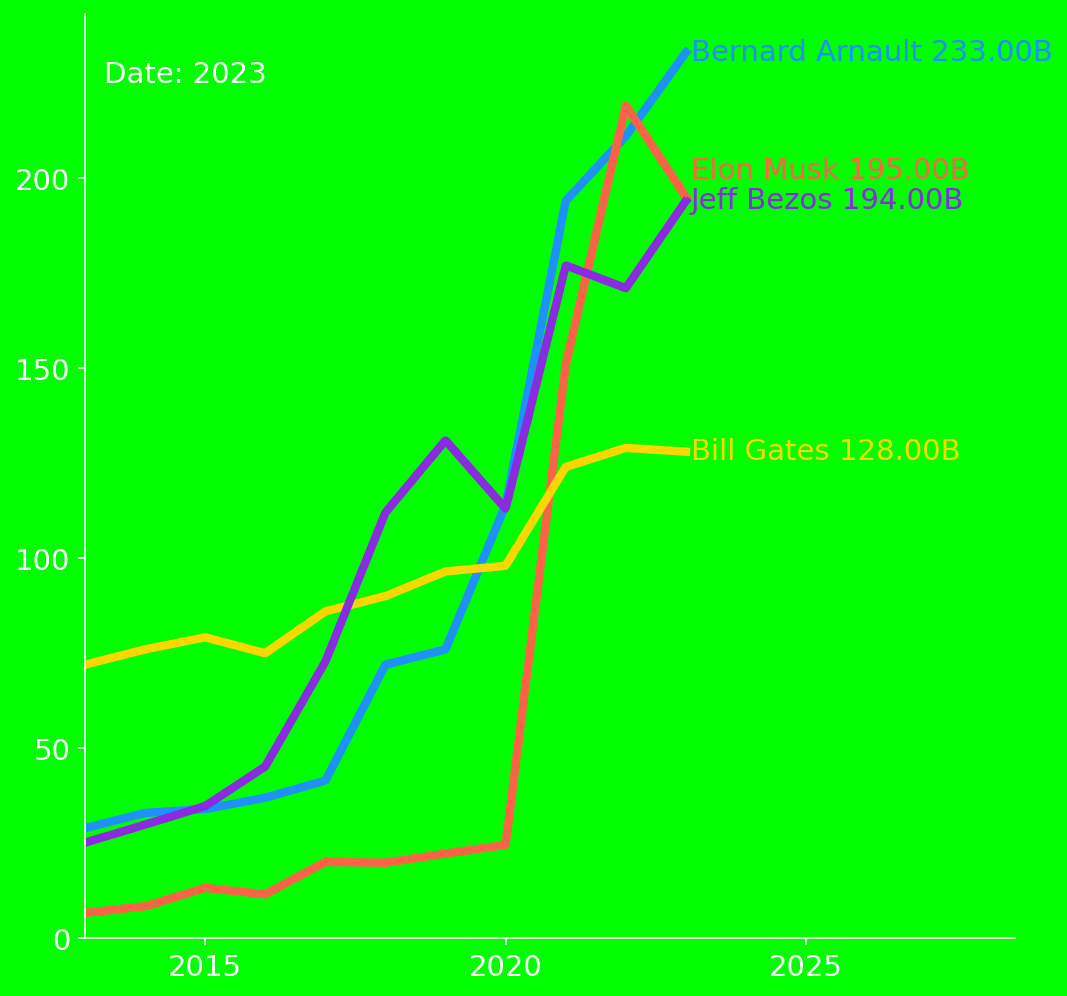

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Creating DataFrame from the provided dataset
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Bernard Arnault': [29.0, 33.0, 34.0, 37.0, 41.5, 72.0, 76.0, 114.0, 194.0, 211.0, 233.0],
    'Elon Musk': [6.7, 8.4, 13.3, 11.6, 20.1, 19.9, 22.3, 24.6, 151.0, 219.0, 195.0],
    'Bill Gates': [72.0, 76.0, 79.2, 75.0, 86.0, 90.0, 96.5, 98.0, 124.0, 129.0, 128.0],
    'Jeff Bezos': [25.2, 29.9, 34.8, 45.2, 72.8, 112.0, 131.0, 113.0, 177.0, 171.0, 194.0]
}

df = pd.DataFrame(data)

# Convert the 'Year' column to datetime format
df['Year'] = df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Year'] + '-01-01')

x_data = df['Date'].values.astype('datetime64[D]')
y_data = {
    'Bernard Arnault': df['Bernard Arnault'].values,
    'Elon Musk': df['Elon Musk'].values,
    'Bill Gates': df['Bill Gates'].values,
    'Jeff Bezos': df['Jeff Bezos'].values
}

# Number of frames for a 15 second animation at 60 fps
total_frames = 15 * 60

# Interpolate the data to get more frames
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp = {key: np.interp(time_interp, np.arange(len(values)), values) for key, values in y_data.items()}

# Calculate the six-year period with day precision
six_years = np.timedelta64(6 * 365, 'D')  # Approximation of 6 years in days
end_initial_period = x_interp.min() + six_years

# Create the figure and axes with high resolution to avoid pixelation
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)  # Adjust the size and resolution of the figure

# Set the green background for the figure and axes
fig.patch.set_facecolor('#00FF00')
ax.set_facecolor('#00FF00')

# Remove the top and right frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Configure the x-axis to display only years every 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Brighter colors
colors = {
    'Bernard Arnault': '#1E90FF',  # Dodger Blue
    'Elon Musk': '#FF6347',  # Tomato
    'Bill Gates': '#FFD700',  # Gold
    'Jeff Bezos': '#8A2BE2'  # Blue Violet
}

# Set the color of the axes and labels to white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white', labelsize=14)
ax.tick_params(axis='y', colors='white', labelsize=14)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Create the data lines
lines = {key: ax.plot([], [], label=key, lw=4, color=color, zorder=1)[0] for key, color in colors.items()}

# Create the circles to represent the markers
circles = {key: plt.Circle((0, 0), 0.8, color=color, fill=True, zorder=2) for key, color in colors.items()}

# Add the circles to the axes
for circle in circles.values():
    ax.add_patch(circle)

# Create the percentage annotations (initialized empty)
texts = {key: ax.text(0, 0, '', ha='left', va='center', fontsize=14, color=color, zorder=3) for key, color in colors.items()}

# Create the annotation for the date
date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=14, color='white', zorder=3)

# Function to adjust annotation positions to avoid overlap
def adjust_text_positions(texts):
    positions = [text.get_position() for text in texts.values()]
    for i, (key, text) in enumerate(texts.items()):
        x, y = text.get_position()
        offset = 0
        for j, (other_key, other_text) in enumerate(texts.items()):
            if i != j:
                other_x, other_y = other_text.get_position()
                if abs(y - other_y) < 6:  # Adjust the threshold as needed
                    offset = max(offset, abs(y - other_y) + 6)
        text.set_position((x, y + offset))

# Initialize the function for the animation setup
def init():
    # Initialize with the first data point
    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x_interp[:1], y[:1])
        circles[key].set_center((x_interp[0], y[0]))
        texts[key].set_position((x_interp[0] + np.timedelta64(30, 'D'), y[0]))
        texts[key].set_text('{} {:.2f}B'.format(key, y[0]))

    ax.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(2000, 'D'))  # Add a larger margin to the right
    ax.set_ylim(0, max(max(values) for values in y_interp.values()) + 10)
    date_text.set_text('Date: {}'.format(pd.to_datetime(x_interp[0]).strftime("%Y")))

    adjust_text_positions(texts)
    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text]

# Function to update the animation
def update(frame):
    x = x_interp[:frame + 1]

    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x, y[:frame + 1])
        circles[key].set_center((x[frame], y[frame]))
        texts[key].set_position((x[frame] + np.timedelta64(30, 'D'), y[frame]))
        texts[key].set_text('{} {:.2f}B'.format(key, y[frame]))

    # Update the date text
    if len(x) > 0:
        date_text.set_text('Date: {}'.format(pd.to_datetime(x[frame]).strftime("%Y")))

    adjust_text_positions(texts)
    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text]

# Create the animation with 60 frames per second (interval=1000/60 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Save the animation as a video file
ani.save('billionaires.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="billionaires.mp4" type="video/mp4">')


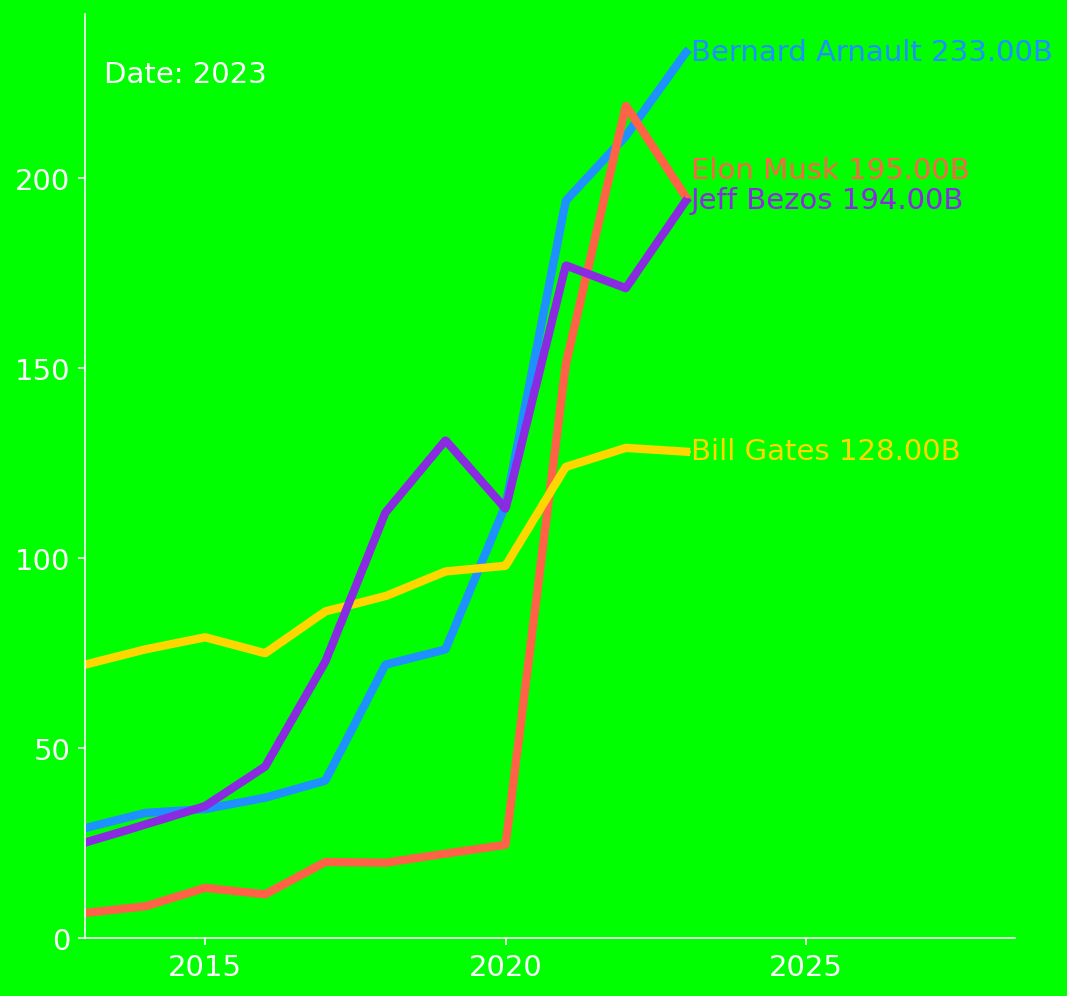

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Creating DataFrame from the provided dataset
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Bernard Arnault': [29.0, 33.0, 34.0, 37.0, 41.5, 72.0, 76.0, 114.0, 194.0, 211.0, 233.0],
    'Elon Musk': [6.7, 8.4, 13.3, 11.6, 20.1, 19.9, 22.3, 24.6, 151.0, 219.0, 195.0],
    'Bill Gates': [72.0, 76.0, 79.2, 75.0, 86.0, 90.0, 96.5, 98.0, 124.0, 129.0, 128.0],
    'Jeff Bezos': [25.2, 29.9, 34.8, 45.2, 72.8, 112.0, 131.0, 113.0, 177.0, 171.0, 194.0]
}

df = pd.DataFrame(data)

# Convert the 'Year' column to datetime format
df['Year'] = df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Year'] + '-01-01')

x_data = df['Date'].values.astype('datetime64[D]')
y_data = {
    'Bernard Arnault': df['Bernard Arnault'].values,
    'Elon Musk': df['Elon Musk'].values,
    'Bill Gates': df['Bill Gates'].values,
    'Jeff Bezos': df['Jeff Bezos'].values
}

# Number of frames for a 15 second animation at 60 fps
total_frames = 15 * 60

# Interpolate the data to get more frames
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp = {key: np.interp(time_interp, np.arange(len(values)), values) for key, values in y_data.items()}

# Calculate the six-year period with day precision
six_years = np.timedelta64(6 * 365, 'D')  # Approximation of 6 years in days
end_initial_period = x_interp.min() + six_years

# Create the figure and axes with high resolution to avoid pixelation
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)  # Adjust the size and resolution of the figure

# Set the green background for the figure and axes
fig.patch.set_facecolor('#00FF00')
ax.set_facecolor('#00FF00')

# Remove the top and right frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Configure the x-axis to display only years every 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Brighter colors
colors = {
    'Bernard Arnault': '#1E90FF',  # Dodger Blue
    'Elon Musk': '#FF6347',  # Tomato
    'Bill Gates': '#FFD700',  # Gold
    'Jeff Bezos': '#8A2BE2'  # Blue Violet
}

# Set the color of the axes and labels to white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white', labelsize=14)
ax.tick_params(axis='y', colors='white', labelsize=14)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Create the data lines
lines = {key: ax.plot([], [], label=key, lw=4, color=color, zorder=1)[0] for key, color in colors.items()}

# Create the circles to represent the markers
circles = {key: plt.Circle((0, 0), 0.8, color=color, fill=True, zorder=2) for key, color in colors.items()}

# Add the circles to the axes
for circle in circles.values():
    ax.add_patch(circle)

# Create the percentage annotations (initialized empty)
texts = {key: ax.text(0, 0, '', ha='left', va='center', fontsize=14, color=color, zorder=3) for key, color in colors.items()}

# Create the annotation for the date
date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=14, color='white', zorder=3)

# Create lines for annotations
lines_annotations = {key: ax.plot([], [], color=color, lw=1, linestyle='--')[0] for key, color in colors.items()}

# Function to adjust annotation positions to avoid overlap
def adjust_text_positions(texts):
    positions = [text.get_position() for text in texts.values()]
    for i, (key, text) in enumerate(texts.items()):
        x, y = text.get_position()
        offset = 0
        for j, (other_key, other_text) in enumerate(texts.items()):
            if i != j:
                other_x, other_y = other_text.get_position()
                if abs(y - other_y) < 6:  # Adjust the threshold as needed
                    offset = max(offset, abs(y - other_y) + 6)
        text.set_position((x, y + offset))

# Initialize the function for the animation setup
def init():
    # Initialize with the first data point
    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x_interp[:1], y[:1])
        circles[key].set_center((x_interp[0], y[0]))
        texts[key].set_position((x_interp[0] + np.timedelta64(30, 'D'), y[0]))
        texts[key].set_text('{} {:.2f}B'.format(key, y[0]))
        lines_annotations[key].set_data([x_interp[0], x_interp[0] + np.timedelta64(30, 'D')], [y[0], y[0]])

    ax.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(2000, 'D'))  # Add a larger margin to the right
    ax.set_ylim(0, max(max(values) for values in y_interp.values()) + 10)
    date_text.set_text('Date: {}'.format(pd.to_datetime(x_interp[0]).strftime("%Y")))

    adjust_text_positions(texts)
    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text] + list(lines_annotations.values())

# Function to update the animation
def update(frame):
    x = x_interp[:frame + 1]

    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x, y[:frame + 1])
        circles[key].set_center((x[frame], y[frame]))
        texts[key].set_position((x[frame] + np.timedelta64(30, 'D'), y[frame]))
        texts[key].set_text('{} {:.2f}B'.format(key, y[frame]))
        lines_annotations[key].set_data([x[frame], x[frame] + np.timedelta64(30, 'D')], [y[frame], y[frame]])

    # Update the date text
    if len(x) > 0:
        date_text.set_text('Date: {}'.format(pd.to_datetime(x[frame]).strftime("%Y")))

    adjust_text_positions(texts)
    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text] + list(lines_annotations.values())

# Create the animation with 60 frames per second (interval=1000/60 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Save the animation as a video file
ani.save('billionaires.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="billionaires.mp4" type="video/mp4">')


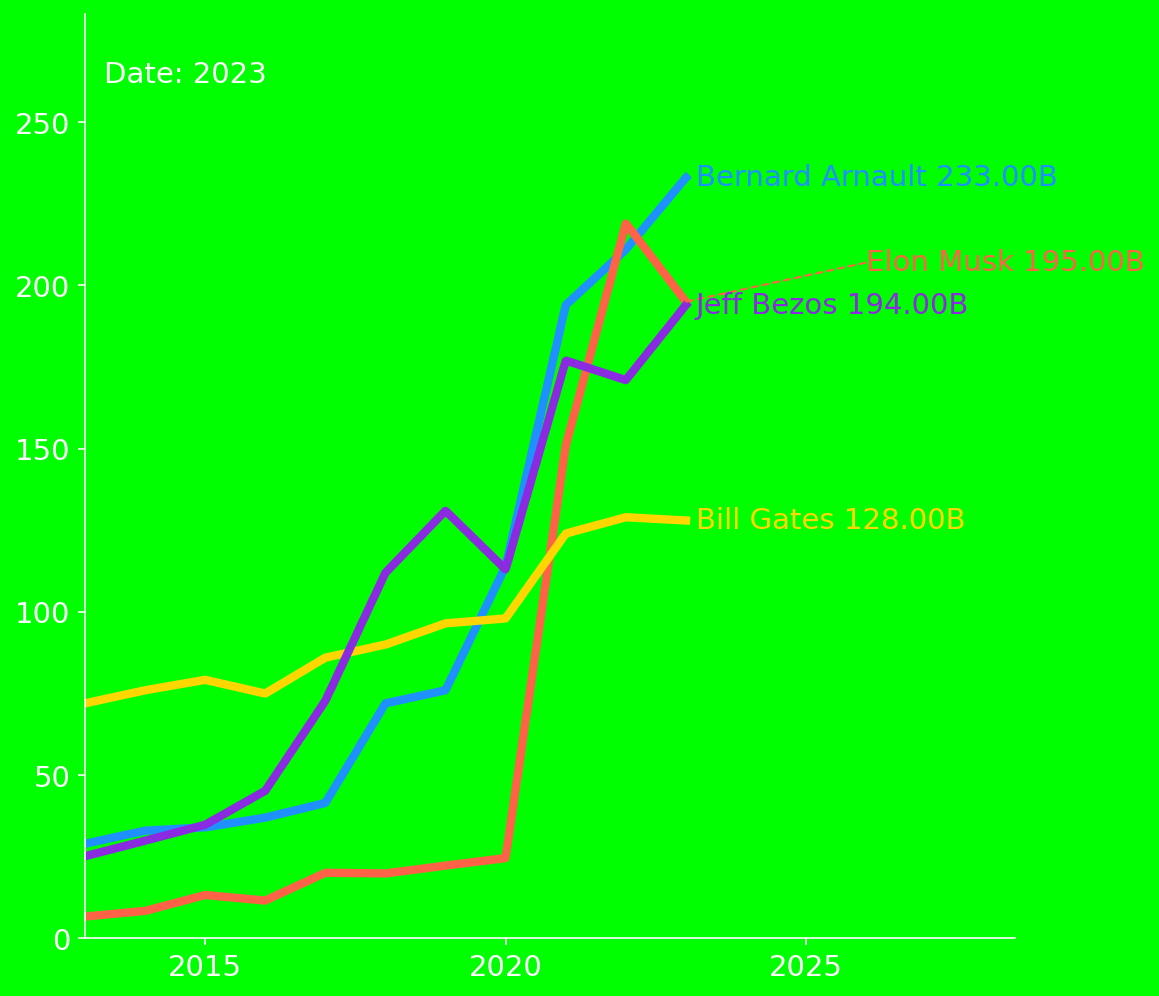

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Creating DataFrame from the provided dataset
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Bernard Arnault': [29.0, 33.0, 34.0, 37.0, 41.5, 72.0, 76.0, 114.0, 194.0, 211.0, 233.0],
    'Elon Musk': [6.7, 8.4, 13.3, 11.6, 20.1, 19.9, 22.3, 24.6, 151.0, 219.0, 195.0],
    'Bill Gates': [72.0, 76.0, 79.2, 75.0, 86.0, 90.0, 96.5, 98.0, 124.0, 129.0, 128.0],
    'Jeff Bezos': [25.2, 29.9, 34.8, 45.2, 72.8, 112.0, 131.0, 113.0, 177.0, 171.0, 194.0]
}

df = pd.DataFrame(data)

# Convert the 'Year' column to datetime format
df['Year'] = df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Year'] + '-01-01')

x_data = df['Date'].values.astype('datetime64[D]')
y_data = {
    'Bernard Arnault': df['Bernard Arnault'].values,
    'Elon Musk': df['Elon Musk'].values,
    'Bill Gates': df['Bill Gates'].values,
    'Jeff Bezos': df['Jeff Bezos'].values
}

# Number of frames for a 15 second animation at 60 fps
total_frames = 15 * 60

# Interpolate the data to get more frames
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp = {key: np.interp(time_interp, np.arange(len(values)), values) for key, values in y_data.items()}

# Create the figure and axes with high resolution to avoid pixelation
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)  # Adjust the size and resolution of the figure

# Set the green background for the figure and axes
fig.patch.set_facecolor('#00FF00')
ax.set_facecolor('#00FF00')

# Remove the top and right frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Configure the x-axis to display only years every 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Brighter colors
colors = {
    'Bernard Arnault': '#1E90FF',  # Dodger Blue
    'Elon Musk': '#FF6347',  # Tomato
    'Bill Gates': '#FFD700',  # Gold
    'Jeff Bezos': '#8A2BE2'  # Blue Violet
}

# Set the color of the axes and labels to white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white', labelsize=14)
ax.tick_params(axis='y', colors='white', labelsize=14)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Create the data lines
lines = {key: ax.plot([], [], label=key, lw=4, color=color, zorder=1)[0] for key, color in colors.items()}

# Create the circles to represent the markers
circles = {key: plt.Circle((0, 0), 0.8, color=color, fill=True, zorder=2) for key, color in colors.items()}

# Add the circles to the axes
for circle in circles.values():
    ax.add_patch(circle)

# Create the percentage annotations (initialized empty)
texts = {key: ax.text(0, 0, '', ha='left', va='center', fontsize=14, color=color, zorder=3) for key, color in colors.items()}

# Create the annotation for the date
date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=14, color='white', zorder=3)

# Create lines for annotations (initialized empty)
lines_annotations = {key: ax.plot([], [], color=color, lw=1, linestyle='--')[0] for key, color in colors.items()}

# Function to adjust annotation positions to avoid overlap
def adjust_text_positions(texts, circles):
    positions = [text.get_position() for text in texts.values()]
    for i, (key, text) in enumerate(texts.items()):
        x, y = text.get_position()
        original_x, original_y = circles[key].center
        offset_y = 0
        moved = False
        for j, (other_key, other_text) in enumerate(texts.items()):
            if i != j:
                other_x, other_y = other_text.get_position()
                if abs(y - other_y) < 12:  # Adjust the threshold as needed
                    offset_y = 12  # Move annotation 12 units up if there is overlap
                    moved = True
        if moved:
            text.set_position((original_x + np.timedelta64(3 * 365, 'D'), original_y + offset_y))  # Adjusting rightwards by 3 years and upwards

            # Update the line annotation only if moved
            lines_annotations[key].set_data([original_x, original_x + np.timedelta64(3 * 365, 'D')], [original_y, original_y + offset_y])
        else:
            text.set_position((original_x + np.timedelta64(60, 'D'), original_y))  # Initial slight right offset
            lines_annotations[key].set_data([], [])  # No line if no offset

# Initialize the function for the animation setup
def init():
    # Initialize with the first data point
    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x_interp[:1], y[:1])
        circles[key].set_center((x_interp[0], y[0]))
        texts[key].set_position((x_interp[0] + np.timedelta64(60, 'D'), y[0]))  # Initial slight right offset
        texts[key].set_text('{} {:.2f}B'.format(key, y[0]))

    ax.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(2000, 'D'))  # Add a larger margin to the right
    ax.set_ylim(0, max(max(values) for values in y_interp.values()) + 50)
    date_text.set_text('Date: {}'.format(pd.to_datetime(x_interp[0]).strftime("%Y")))

    adjust_text_positions(texts, circles)
    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text] + list(lines_annotations.values())

# Function to update the animation
def update(frame):
    x = x_interp[:frame + 1]

    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x, y[:frame + 1])
        circles[key].set_center((x[frame], y[frame]))
        texts[key].set_position((x[frame] + np.timedelta64(60, 'D'), y[frame]))
        texts[key].set_text('{} {:.2f}B'.format(key, y[frame]))

    # Update the date text
    if len(x) > 0:
        date_text.set_text('Date: {}'.format(pd.to_datetime(x[frame]).strftime("%Y")))

    adjust_text_positions(texts, circles)
    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text] + list(lines_annotations.values())

# Create the animation with 60 frames per second (interval=1000/60 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Save the animation as a video file
ani.save('billionaires.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="billionaires.mp4" type="video/mp4">')


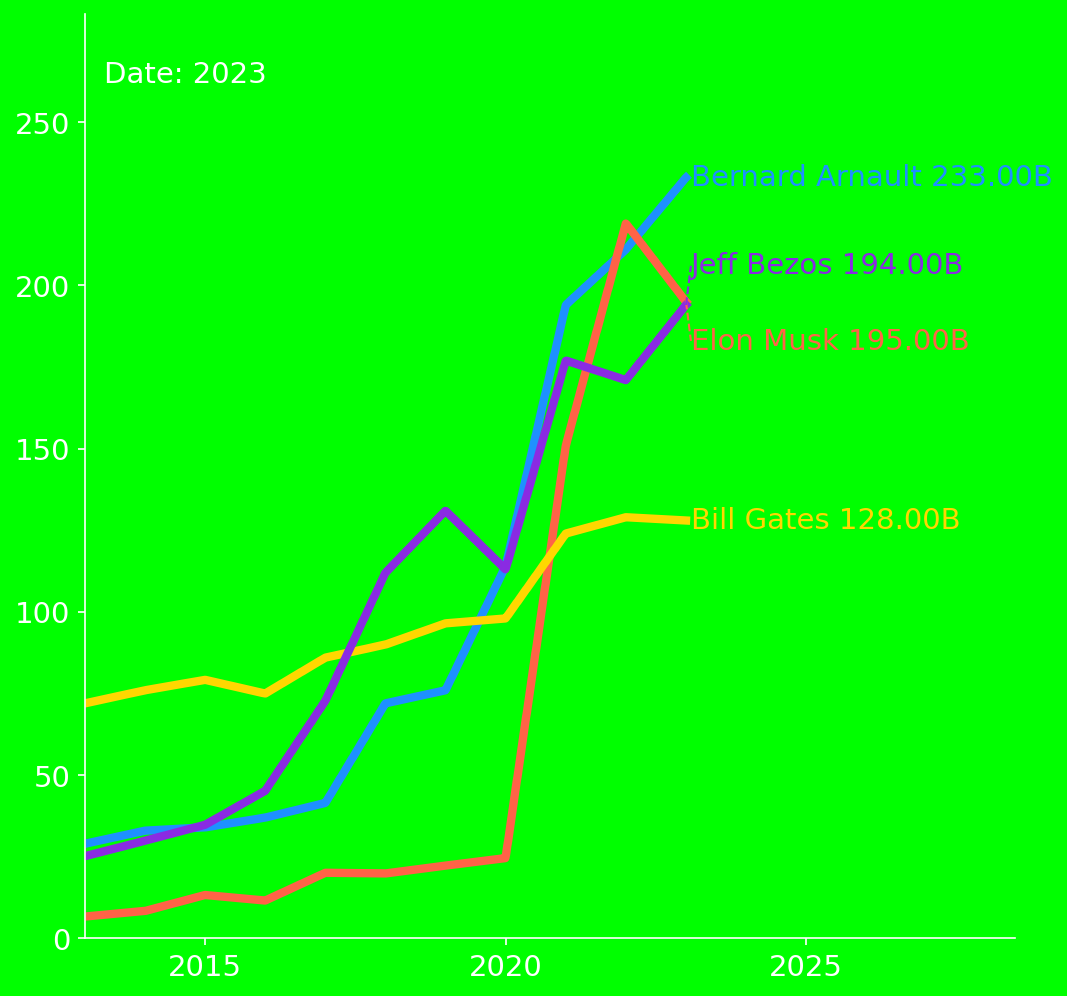

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Creating DataFrame from the provided dataset
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Bernard Arnault': [29.0, 33.0, 34.0, 37.0, 41.5, 72.0, 76.0, 114.0, 194.0, 211.0, 233.0],
    'Elon Musk': [6.7, 8.4, 13.3, 11.6, 20.1, 19.9, 22.3, 24.6, 151.0, 219.0, 195.0],
    'Bill Gates': [72.0, 76.0, 79.2, 75.0, 86.0, 90.0, 96.5, 98.0, 124.0, 129.0, 128.0],
    'Jeff Bezos': [25.2, 29.9, 34.8, 45.2, 72.8, 112.0, 131.0, 113.0, 177.0, 171.0, 194.0]
}

df = pd.DataFrame(data)

# Convert the 'Year' column to datetime format
df['Year'] = df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Year'] + '-01-01')

x_data = df['Date'].values.astype('datetime64[D]')
y_data = {
    'Bernard Arnault': df['Bernard Arnault'].values,
    'Elon Musk': df['Elon Musk'].values,
    'Bill Gates': df['Bill Gates'].values,
    'Jeff Bezos': df['Jeff Bezos'].values
}

# Number of frames for a 15 second animation at 60 fps
total_frames = 15 * 60

# Interpolate the data to get more frames
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp = {key: np.interp(time_interp, np.arange(len(values)), values) for key, values in y_data.items()}

# Create the figure and axes with high resolution to avoid pixelation
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)  # Adjust the size and resolution of the figure

# Set the green background for the figure and axes
fig.patch.set_facecolor('#00FF00')
ax.set_facecolor('#00FF00')

# Remove the top and right frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Configure the x-axis to display only years every 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Brighter colors
colors = {
    'Bernard Arnault': '#1E90FF',  # Dodger Blue
    'Elon Musk': '#FF6347',  # Tomato
    'Bill Gates': '#FFD700',  # Gold
    'Jeff Bezos': '#8A2BE2'  # Blue Violet
}

# Set the color of the axes and labels to white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white', labelsize=14)
ax.tick_params(axis='y', colors='white', labelsize=14)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Create the data lines
lines = {key: ax.plot([], [], label=key, lw=4, color=color, zorder=1)[0] for key, color in colors.items()}

# Create the circles to represent the markers
circles = {key: plt.Circle((0, 0), 0.8, color=color, fill=True, zorder=2) for key, color in colors.items()}

# Add the circles to the axes
for circle in circles.values():
    ax.add_patch(circle)

# Create the percentage annotations (initialized empty)
texts = {key: ax.text(0, 0, '', ha='left', va='center', fontsize=14, color=color, zorder=3) for key, color in colors.items()}

# Create the annotation for the date
date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=14, color='white', zorder=3)

# Create lines for annotations (initialized empty)
lines_annotations = {key: ax.plot([], [], color=color, lw=1, linestyle='--')[0] for key, color in colors.items()}

# Function to adjust annotation positions to avoid overlap
def adjust_text_positions(texts, circles):
    positions = [(key, text.get_position()) for key, text in texts.items()]
    # Sort texts by value in descending order
    sorted_texts = sorted(positions, key=lambda x: y_interp[x[0]][-1], reverse=True)

    for i, (key, (x, y)) in enumerate(sorted_texts):
        original_x, original_y = circles[key].center
        offset_y = 0
        moved = False

        # Check for overlap with other annotations
        for j, (other_key, (other_x, other_y)) in enumerate(sorted_texts):
            if i != j:
                if abs(y - other_y) < 12:  # Adjust the threshold as needed
                    offset_y = 12  # Move annotation 12 units up or down to avoid overlap
                    if y > other_y:
                        offset_y *= -1  # Move annotation up or down based on overlap
                    moved = True
                    break  # Only move one annotation up or down

        if moved:
            new_y = max(original_y + offset_y, 0)  # Ensure annotations don't go below x-axis
            texts[key].set_position((original_x + np.timedelta64(30, 'D'), new_y))  # Adjusting rightwards and upwards or downwards
            # Update the line annotation only if moved
            lines_annotations[key].set_data([original_x, original_x + np.timedelta64(30, 'D')], [original_y, new_y])
        else:
            texts[key].set_position((original_x + np.timedelta64(30, 'D'), y))  # Initial slight right offset
            lines_annotations[key].set_data([], [])  # No line if no offset

# Initialize the function for the animation setup
def init():
    # Initialize with the first data point
    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x_interp[:1], y[:1])
        circles[key].set_center((x_interp[0], y[0]))
        texts[key].set_position((x_interp[0] + np.timedelta64(60, 'D'), y[0]))  # Initial slight right offset
        texts[key].set_text('{} {:.2f}B'.format(key, y[0]))

    ax.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(2000, 'D'))  # Add a larger margin to the right
    ax.set_ylim(0, max(max(values) for values in y_interp.values()) + 50)
    date_text.set_text('Date: {}'.format(pd.to_datetime(x_interp[0]).strftime("%Y")))

    adjust_text_positions(texts, circles)
    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text] + list(lines_annotations.values())

# Function to update the animation
def update(frame):
    x = x_interp[:frame + 1]

    for key in lines.keys():
        y = y_interp[key]
        lines[key].set_data(x, y[:frame + 1])
        circles[key].set_center((x[frame], y[frame]))
        texts[key].set_position((x[frame] + np.timedelta64(60, 'D'), y[frame]))
        texts[key].set_text('{} {:.2f}B'.format(key, y[frame]))

    # Update the date text
    if len(x) > 0:
        date_text.set_text('Date: {}'.format(pd.to_datetime(x[frame]).strftime("%Y")))

    adjust_text_positions(texts, circles)
    return list(lines.values()) + list(circles.values()) + list(texts.values()) + [date_text] + list(lines_annotations.values())

# Create the animation with 60 frames per second (interval=1000/60 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Save the animation as a video file
ani.save('billionaires.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="billionaires.mp4" type="video/mp4">')
